In [1]:
## import libraries
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('/users/mayurbansal/downloads/')

## Read Data

In [3]:
data=pd.read_csv('purchase_credit_card.csv')

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442458 entries, 0 to 442457
Data columns (total 11 columns):
Year-Month                      442458 non-null int64
Agency Number                   442458 non-null int64
Agency Name                     442458 non-null object
Cardholder Last Name            442458 non-null object
Cardholder First Initial        442458 non-null object
Description                     442458 non-null object
Amount                          442458 non-null float64
Vendor                          442458 non-null object
Transaction Date                442458 non-null object
Posted Date                     442458 non-null object
Merchant Category Code (MCC)    442458 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ MB


### 0.4 million entries and 12 features

In [5]:
#get column names
for col in data.columns: 
    print(col) 

Year-Month
Agency Number
Agency Name
Cardholder Last Name
Cardholder First Initial
Description
Amount
Vendor
Transaction Date
Posted Date
Merchant Category Code (MCC)


#### We have information on Year and Month of transaction, Agency Number, Agency name, Cardholder Name, Description of purchase, amount of purchase, Vendor, Merchant Category code

In [6]:
# feature 1: use full name to represent each person uniquely
data['FullName']=data['Cardholder First Initial'].str.cat(data['Cardholder Last Name'],sep=" ")
data.head()


,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),FullName
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,C Mason
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,C Mason
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,J Massey
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",T Massey
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",M Mauro-Herrera


#### Feature 1 is the fullname of the customer making the transaction to uniquely identify customers
#### Let us explore the transaction date feature

In [7]:
data['Year-Month'].dtype

dtype('int64')

In [8]:
data['Transaction Date'].dtype


dtype('O')

In [9]:
#convert transaction date column to a datetime structure
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

In [10]:
#new columns related to transaction date
data['yearoftransaction'] = pd.DatetimeIndex(data['Transaction Date']).year
data['monthoftransaction'] = pd.DatetimeIndex(data['Transaction Date']).month
data['dateoftransaction'] = pd.DatetimeIndex(data['Transaction Date']).day
data['weekdayoftransaction'] = pd.DatetimeIndex(data['Transaction Date']).weekday

In [11]:
data.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),FullName,yearoftransaction,monthoftransaction,dateoftransaction,weekdayoftransaction
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,C Mason,2013,7,30,1
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,C Mason,2013,7,30,1
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,J Massey,2013,7,29,0
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",T Massey,2013,7,30,1
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",M Mauro-Herrera,2013,7,30,1


### Features are created around transaction date which is transformed into more granular timeframes like Year, Month, date and week day of transaction

In [12]:
data[['yearoftransaction','monthoftransaction','dateoftransaction','weekdayoftransaction']].head()


,yearoftransaction,monthoftransaction,dateoftransaction,weekdayoftransaction
0,2013,7,30,1
1,2013,7,30,1
2,2013,7,29,0
3,2013,7,30,1
4,2013,7,30,1


In [13]:
## remove negative amounts from analysis 
data=data[data['Amount'] > 0]

#### I am ignoring the negative amounts in my analyis as these are mainly refund or cashback values and for fraud detection we are not concerned with these amounts.

### Features are created based on monthly transactions

In [14]:
## monthly transactions by name
monthly=data.groupby(['monthoftransaction','FullName']).agg({'Amount':'sum','FullName':'count'}).rename(
columns={'Amount':'monthlyspent',
        'FullName':'monthlycountoftrans'}).reset_index()

monthly.head()

,monthoftransaction,FullName,monthlyspent,monthlycountoftrans
0,1,2 24100,0.77,1
1,1,4 42000,250.14,2
2,1,A ADMIRE,253.12,4
3,1,A Adams,150.84,3
4,1,A Adkins,771.77,3


#### Total money spent by each user is stored and number of accompanying transactions are noted as well

In [15]:
##merge with data
data_ver2=pd.merge(data,monthly,on=['FullName','monthoftransaction'])

In [16]:
data_ver2['fracofmonthlyspending']=data_ver2['Amount']/data_ver2['monthlyspent']


### Fraction of monthly spending spent on each particular transaction is noted. The idea is to look for monthly buying behaviour of users. A bigger fraction of monthly transaction on a particular transaction may reveal more insights for detection

In [17]:
data_ver2.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),FullName,yearoftransaction,monthoftransaction,dateoftransaction,weekdayoftransaction,monthlyspent,monthlycountoftrans,fracofmonthlyspending
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,C Mason,2013,7,30,1,21877.94,46,0.040680
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,C Mason,2013,7,30,1,21877.94,46,0.016864
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,C Mason,2013,7,30,1,21877.94,46,0.040680
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,324.00,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,C Mason,2013,7,30,1,21877.94,46,0.014809
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,337.02,HOLIDAY INN EXPRESS,2013-07-21,07/30/2013 12:00:00 AM,HOLIDAY INNS,C Mason,2013,7,21,6,21877.94,46,0.015405


In [18]:
## transactions by merchant
bymerchantspent=data.groupby(['Merchant Category Code (MCC)','FullName']).agg({'Amount':'sum'}).rename(
columns={'Amount':'spentbycategory'}).reset_index()

bymerchantspent.head()

,Merchant Category Code (MCC),FullName,spentbycategory
0,,E Becker,702.38
1,,G UNIVERSITY AMERICAN,180.70
2,"ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES",A Doyle,100.00
3,"ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES",A Fesmire,1946.83
4,"ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES",A Maib,13480.50


In [19]:
##merge with data
data_ver3=pd.merge(data_ver2,bymerchantspent,on=['FullName','Merchant Category Code (MCC)'])

In [20]:
data_ver3.head()


,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),FullName,yearoftransaction,monthoftransaction,dateoftransaction,weekdayoftransaction,monthlyspent,monthlycountoftrans,fracofmonthlyspending,spentbycategory
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,C Mason,2013,7,30,1,21877.94,46,0.040680,1780.00
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,C Mason,2013,7,30,1,21877.94,46,0.040680,1780.00
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,C Mason,2013,7,30,1,21877.94,46,0.016864,4257.29
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,324.00,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,SHERATON,C Mason,2013,7,30,1,21877.94,46,0.014809,4257.29
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,432.24,SHERATON DALLAS,2013-07-10,07/12/2013 12:00:00 AM,SHERATON,C Mason,2013,7,10,2,21877.94,46,0.019757,4257.29


In [21]:
data_ver3['fracofmerchantspending']=data_ver3['Amount']/data_ver3['spentbycategory']


In [22]:
data_ver3.head()


,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,FullName,yearoftransaction,monthoftransaction,dateoftransaction,weekdayoftransaction,monthlyspent,monthlycountoftrans,fracofmonthlyspending,spentbycategory,fracofmerchantspending
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,...,C Mason,2013,7,30,1,21877.94,46,0.040680,1780.00,0.500000
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,07/31/2013 12:00:00 AM,...,C Mason,2013,7,30,1,21877.94,46,0.040680,1780.00,0.500000
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,...,C Mason,2013,7,30,1,21877.94,46,0.016864,4257.29,0.086665
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,324.00,SHERATON HOTEL,2013-07-30,07/31/2013 12:00:00 AM,...,C Mason,2013,7,30,1,21877.94,46,0.014809,4257.29,0.076105
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,432.24,SHERATON DALLAS,2013-07-10,07/12/2013 12:00:00 AM,...,C Mason,2013,7,10,2,21877.94,46,0.019757,4257.29,0.101529


### Features for spending habits of users on each merchant category are created. Includes a feature on how much total money each user is spending on each category and how it is distributed in each transaction through fraction of merchant spending

In [23]:
for col in data_ver3.columns: 
    print(col)

Year-Month
Agency Number
Agency Name
Cardholder Last Name
Cardholder First Initial
Description
Amount
Vendor
Transaction Date
Posted Date
Merchant Category Code (MCC)
FullName
yearoftransaction
monthoftransaction
dateoftransaction
weekdayoftransaction
monthlyspent
monthlycountoftrans
fracofmonthlyspending
spentbycategory
fracofmerchantspending


### Feature on each successive transaction made by each user based on time between each transaction


In [24]:
## Time since last purchase
data_ver4 = data_ver3.sort_values(by=['FullName','Transaction Date'])
data_ver4['time_diff'] = data_ver4.groupby(['FullName'])['Transaction Date'].diff()

### Feature on each successive transaction made by each user based on amount spent


In [25]:
## amount difference in successive transactions per user
data_ver4['amount_diff'] = data_ver4.groupby(['FullName'])['Amount'].diff()

#### Converting time difference in days


In [26]:
data_ver4['time_diff_days']=data_ver4['time_diff'].dt.days

In [27]:
data_ver4.head()


,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,dateoftransaction,weekdayoftransaction,monthlyspent,monthlycountoftrans,fracofmonthlyspending,spentbycategory,fracofmerchantspending,time_diff,amount_diff,time_diff_days
406074,201404,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,...,10,0,4626.46,1,1.000000,4626.46,1.000000,NaT,NaN,NaN
155799,201307,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,16.90,PURCHASE FINANCE CHARGE,2013-07-15,07/15/2013 12:00:00 AM,...,15,0,1812.99,2,0.009322,2819.38,0.005994,NaT,NaN,NaN
155800,201307,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,...,25,3,1812.99,2,0.990678,2819.38,0.637051,10 days,1779.19,10.0
155801,201308,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,2013-08-15,08/15/2013 12:00:00 AM,...,15,3,749.03,2,0.019398,2819.38,0.005154,21 days,-1781.56,21.0
155802,201308,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,...,26,0,749.03,2,0.980602,2819.38,0.260518,11 days,719.97,11.0


### The idea behind these features is that a fraudster tries to make a lot of payments quickly (prob in the same day multiple times) which could be analyzed through the time_diff feature. To accompany it, we have amount difference. A large amount diff value and a small time difference value would require in depth study for possible anomaly cases


In [28]:
for col in data_ver4:
    print(col)

Year-Month
Agency Number
Agency Name
Cardholder Last Name
Cardholder First Initial
Description
Amount
Vendor
Transaction Date
Posted Date
Merchant Category Code (MCC)
FullName
yearoftransaction
monthoftransaction
dateoftransaction
weekdayoftransaction
monthlyspent
monthlycountoftrans
fracofmonthlyspending
spentbycategory
fracofmerchantspending
time_diff
amount_diff
time_diff_days


### Grouping our data on FullName and Merchant category to aggregate data and perform clustering


In [29]:
data_draft=data_ver4.groupby(['FullName','Merchant Category Code (MCC)']).agg({'Amount':'mean','monthlyspent':'mean','fracofmonthlyspending':'mean','fracofmerchantspending':'mean','amount_diff':'mean','time_diff_days':'mean'}).rename(
columns={'Amount':'MeanAmount',
        'monthlyspent':'monthlymeanbycat',
        'fracofmonthlyspending':'meanfracmonth',
        'fracofmerchantspending':'meanfracmerchant',
        'amount_diff':'meanamountdiff',
        'time_diff_days':'meantimediff'}).reset_index()

#### I witness some missing data in the meanamount diff and meantimediff columns. These are cases when a particular user has just one transaction in one category. We can look these cases seperately as these do not raise an alarm. Dropping these points from my analysis for now


In [30]:
data_draft.head()


,FullName,Merchant Category Code (MCC),MeanAmount,monthlymeanbycat,meanfracmonth,meanfracmerchant,meanamountdiff,meantimediff
0,1 15000,OTHER FEES,4626.460000,4626.460000,1.000000,1.000000,NaN,NaN
1,2 24100,OTHER FEES,313.264444,625.715556,0.666667,0.111111,-2.111250,30.250000
2,4 42000,OTHER FEES,133.998125,252.165625,0.625000,0.062500,-0.060667,22.333333
3,4 44600,OTHER FEES,111.990000,111.990000,1.000000,1.000000,NaN,NaN
4,4 48000,OTHER FEES,137.639091,229.230000,0.636364,0.090909,0.000000,21.300000


### Analyzing amounts by Merchant category code


In [31]:
groupmerch=data.groupby('Merchant Category Code (MCC)') \
  .apply(lambda x: pd.Series({
      'amount_mean_cat'       : x['Amount'].mean()
  })
)

In [32]:
groupmerch['Merchant Category Code (MCC)']=groupmerch.index
groupmerch.sort_values('amount_mean_cat',ascending=False)

,amount_mean_cat,Merchant Category Code (MCC)
Merchant Category Code (MCC),,
GENERAL CONTRACTORS-RESIDENTIAL AND COMMERCIAL,4929.668492,GENERAL CONTRACTORS-RESIDENTIAL AND COMMERCIAL
WYNN LAS VEGAS,3797.920000,WYNN LAS VEGAS
MERIDIEN,3484.685000,MERIDIEN
OTHER FEES,3356.076963,OTHER FEES
PETROLEUM AND PETROLEUM PRODUCTS,3184.617742,PETROLEUM AND PETROLEUM PRODUCTS
...,...,...
AIRLINES AND AIR CARRIERS,29.744157,AIRLINES AND AIR CARRIERS
MOBILE HOME DEALERS,25.675000,MOBILE HOME DEALERS
PAWN SHOPS,20.993333,PAWN SHOPS


In [33]:
groupmerch=groupmerch.rename(columns={groupmerch.columns[1]: "mcc"})


In [34]:
groupmerch.head()


,amount_mean_cat,mcc
Merchant Category Code (MCC),,
,294.360000,
"ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES",858.910326,"ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES"
ADVANTAGE RENT A CAR,785.830000,ADVANTAGE RENT A CAR
ADVERTISING SERVICES,508.086428,ADVERTISING SERVICES
AER LINGUS,757.944286,AER LINGUS


In [35]:
mergeddata=pd.merge(data_draft,groupmerch,how='inner',left_on='Merchant Category Code (MCC)',right_on='mcc')


In [36]:
mergeddata.head()


,FullName,Merchant Category Code (MCC),MeanAmount,monthlymeanbycat,meanfracmonth,meanfracmerchant,meanamountdiff,meantimediff,amount_mean_cat,mcc
0,1 15000,OTHER FEES,4626.460000,4626.460000,1.000000,1.000000,NaN,NaN,3356.076963,OTHER FEES
1,2 24100,OTHER FEES,313.264444,625.715556,0.666667,0.111111,-2.111250,30.250000,3356.076963,OTHER FEES
2,4 42000,OTHER FEES,133.998125,252.165625,0.625000,0.062500,-0.060667,22.333333,3356.076963,OTHER FEES
3,4 44600,OTHER FEES,111.990000,111.990000,1.000000,1.000000,NaN,NaN,3356.076963,OTHER FEES
4,4 48000,OTHER FEES,137.639091,229.230000,0.636364,0.090909,0.000000,21.300000,3356.076963,OTHER FEES


### Feature: Coefficient of Deviation (Baseline comparison of each user based on each merchant category)


In [37]:
## coefficient of deviation (meanamountperuserpercategory/meanamountpercategory)
mergeddata['coeffofdeviation']=mergeddata['MeanAmount']/mergeddata['amount_mean_cat']


In [38]:
mergeddata.sort_values(by="coeffofdeviation",ascending=False)


,FullName,Merchant Category Code (MCC),MeanAmount,monthlymeanbycat,meanfracmonth,meanfracmerchant,meanamountdiff,meantimediff,amount_mean_cat,mcc,coeffofdeviation
30119,G Hunter,COMPUTER NETWORK/INFORMATION SERVICES,107598.650000,212485.500000,0.506381,1.000000,101474.630000,12.000000,284.877182,COMPUTER NETWORK/INFORMATION SERVICES,377.701890
37258,C Johnson,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,216721.312500,526472.752500,0.472541,0.250000,215576.612500,1.500000,722.089295,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,300.130904
9,7 77000,OTHER FEES,913559.627500,913559.667500,0.750000,0.250000,-583459.966667,98.000000,3356.076963,OTHER FEES,272.210571
46042,G Hunter,TELECOMMUNICATION SERVICES,63748.300000,69872.320000,0.912354,1.000000,56708.300000,16.000000,321.877022,TELECOMMUNICATION SERVICES,198.051727
19494,L JOHNSON,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,103101.570000,103101.570000,1.000000,1.000000,96132.650000,80.000000,713.386012,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,144.524238
...,...,...,...,...,...,...,...,...,...,...,...
94,J BRAUNBECK,OTHER FEES,0.080000,3494.488333,0.000029,0.083333,-117.349167,2.083333,3356.076963,OTHER FEES,0.000024
108,J MCCASKILL,OTHER FEES,0.070000,3976.710000,0.000018,1.000000,-6.580000,1.000000,3356.076963,OTHER FEES,0.000021
93,J BRAUN,OTHER FEES,0.066667,1873.023333,0.000170,0.333333,-7.506667,2.333333,3356.076963,OTHER FEES,0.000020
47766,R HILL,ADVERTISING SERVICES,0.010000,32.260000,0.000310,1.000000,-32.240000,7.000000,508.086428,ADVERTISING SERVICES,0.000020


In [39]:
mergeddata['coeffofdeviation'].describe()


count    68867.000000
mean         1.066947
std          3.466214
min          0.000012
25%          0.205481
50%          0.489653
75%          1.056120
max        377.701890
Name: coeffofdeviation, dtype: float64

Text(0, 0.5, 'Frequency')

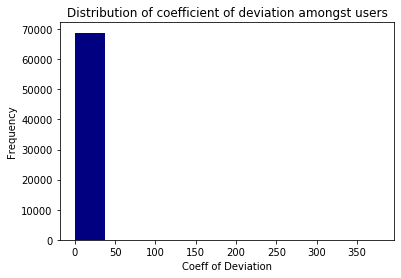

In [40]:
mergeddata['coeffofdeviation'].plot.hist(title='Distribution of coefficient of deviation amongst users', colormap='jet')
plt.xlabel('Coeff of Deviation')
plt.ylabel('Frequency')

In [41]:
## percentile check
mergeddata['coeffofdeviation'].quantile(0.99)

8.992530232697376

#### Percentile check has been used to get an idea of threshold value above which the transaction can be given extra attention. So coeff values above 9 need more sanity checks than the others. For this percentile check, I check the values which are in 1 percent of max coeff of deviation values


In [42]:
#only use complete cases
mergeddata=mergeddata.dropna()

In [43]:
data_final=mergeddata.iloc[:,[0,1,2,3,4,5,6,7,10]]


In [44]:
data_final.head()


,FullName,Merchant Category Code (MCC),MeanAmount,monthlymeanbycat,meanfracmonth,meanfracmerchant,meanamountdiff,meantimediff,coeffofdeviation
1,2 24100,OTHER FEES,313.264444,625.715556,0.666667,0.111111,-2.111250,30.250000,0.093342
2,4 42000,OTHER FEES,133.998125,252.165625,0.625000,0.062500,-0.060667,22.333333,0.039927
4,4 48000,OTHER FEES,137.639091,229.230000,0.636364,0.090909,0.000000,21.300000,0.041012
6,5 53100,OTHER FEES,0.400000,0.400000,1.000000,0.333333,-0.140000,75.000000,0.000119
7,6 60500,OTHER FEES,125.050000,250.100000,0.500000,0.500000,-249.900000,18.000000,0.037261


### To standardize the dataset, I am going with Standard Scaler transformation. 

In [45]:
#predictors and target variable
X=data_final.iloc[:,[2,3,4,5,6,7,8]]
y=data_final.iloc[:,0]

#### For better insights, I decide to label my target variable to be "FullName" and the predictors are the features I created. 

In [46]:
#standardize data using standard scaler transformation
import pandas as pd
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6
0,-0.045981,-0.161435,1.946021,-1.228590,-0.016463,1.484054,-0.279695
1,-0.090688,-0.168095,1.775611,-1.356174,-0.015837,0.989155,-0.295002
2,-0.089780,-0.168504,1.822086,-1.281612,-0.015818,0.924557,-0.294691
3,-0.124005,-0.172583,3.309301,-0.645352,-0.015861,4.281535,-0.306409
4,-0.092919,-0.168131,1.264381,-0.207923,-0.092145,0.718263,-0.295766


### Our dataset is ready for unsupervised learning

#### Train Test

In [47]:
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [48]:
X_train.shape

(45216, 7)

In [49]:
X_train.head()

,0,1,2,3,4,5,6
34506,0.142525,0.035860,-0.389726,-0.645352,0.053728,-0.386143,0.236357
22371,-0.004094,-0.051003,-0.473748,-1.145271,-0.001091,-0.209021,0.012822
51650,-0.112080,-0.100489,-0.731774,1.104362,-0.076348,-0.156927,-0.279549
40862,-0.108643,-0.153727,-0.540874,1.104362,-0.020904,0.655749,-0.292530
62092,-0.097254,-0.108142,-0.651362,-0.645352,-0.038427,-0.198603,-0.239815


In [50]:
X_test.head()

,0,1,2,3,4,5,6
22509,-0.090945,0.033055,-0.745771,-0.645352,-0.078603,-0.386143,-0.218227
16864,0.160945,-0.081801,-0.015319,-0.645352,0.023338,-0.281954,0.496246
53523,-0.056148,0.631312,-0.755823,-0.207923,0.061181,-0.406981,0.203356
902,-0.024350,-0.119602,-0.230102,1.104362,-0.333946,0.093127,0.086501
44342,0.327287,0.181109,-0.407402,1.104362,0.268413,-0.344467,0.547076


#### Plot in a 2-D space just to visualize it.


In [51]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
x_pca.head()

,PC1,PC2
0,0.129192,-1.779339
1,0.015632,-1.324985
2,0.018701,-1.342600
3,0.514837,-4.596954
4,-0.021124,-1.222888


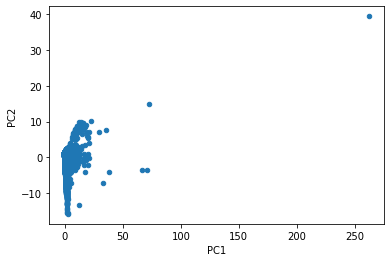

In [52]:
x_pca.plot(kind='scatter', x='PC1', y='PC2')

In [53]:
x_pca.describe()

,PC1,PC2
count,6.748700e+04,6.748700e+04
mean,7.976186e-17,-2.074790e-17
std,1.349700e+00,1.272145e+00
min,-4.658976e-01,-1.578433e+01
25%,-2.896257e-01,-2.882231e-01
50%,-1.701191e-01,2.731300e-01
75%,5.490026e-02,7.564270e-01
max,2.620973e+02,3.939743e+01


### Isolation Forest: An Unsupervised technique

### Model 1 : Max samples 50

In [54]:
# train model using iforest
clf1 = IForest(behaviour="new", max_samples=50) 
clf1.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=50, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

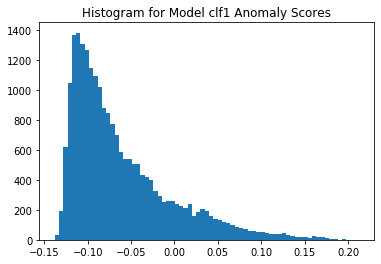

In [55]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
# We apply the model to the test data X_test to get the outlier scores.
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf1 Anomaly Scores")
plt.show()

### 0.15 as my threshold value based on histogram plot

In [57]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.15, 0, 1)
X_test_cluster['cluster'].value_counts()



1    15030
0     7241
Name: cluster, dtype: int64

### The first attempt at modeling gives 7241 outlier labels

### Model 2: Max samples 100

In [58]:
# train model 2 using iforest
clf2 = IForest(behaviour="new", max_samples=100) 
clf2.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=100, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

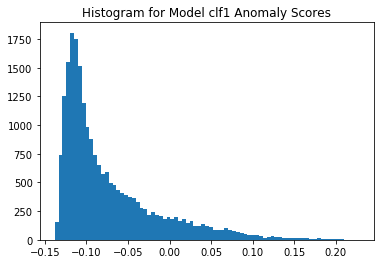

In [59]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
# We apply the model to the test data X_test to get the outlier scores.
y_test_scores2 = clf2.decision_function(X_test)  # outlier scores
y_test_scores2 = pd.Series(y_test_scores2)
y_test_scores2.head()

import matplotlib.pyplot as plt
plt.hist(y_test_scores2, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf1 Anomaly Scores")
plt.show()

In [60]:
X_test_cluster2 = X_test.copy()
X_test_cluster2['distance'] = y_test_scores2
X_test_cluster2['cluster'] = np.where(X_test_cluster2['distance']<0.15, 0, 1)
X_test_cluster2['cluster'].value_counts()

1    15037
0     7234
Name: cluster, dtype: int64

### Combination Methods to solve overfitting issues

In [61]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer

# The predictions of the training data can be obtained by clf.decision_scores_.
# It is already generated during the model building process.
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_
                            })

# The predictions of the test data need to be predicted using clf.decision_function(X_test)
test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test) 
                            })

In [62]:
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)
train_scores_norm.shape

(45216, 2)

### Combination by Average

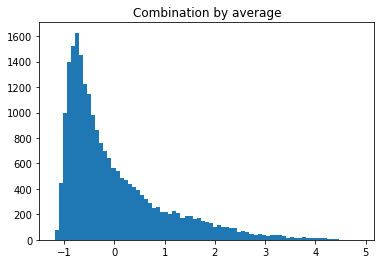

In [63]:
# Combination by average
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

### Threshold value of 2.5

In [65]:
df_test = X_test.copy()
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<2.5, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    21620
1      651
Name: y_by_average_cluster, dtype: int64

In [66]:
651/22271

0.02923083830990975

### 2.9 percent of data falls in our anomalous cluster

In [67]:

df_test.groupby('y_by_average_cluster').mean().round(2)

,0,1,2,3,4,5,6,y_by_average_score
y_by_average_cluster,,,,,,,,
0,-0.04,-0.05,-0.03,-0.01,-0.02,-0.02,-0.07,-0.10
1,1.49,1.43,1.04,0.39,0.27,0.52,2.30,3.15


### Combination by max

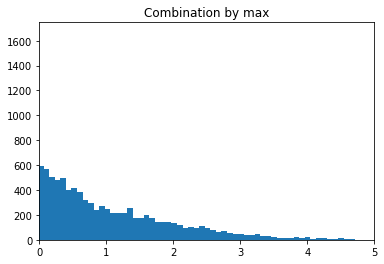

In [68]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.xlim(0,5)
plt.show()

In [69]:
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<2.5, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    21496
1      775
Name: y_by_maximization_cluster, dtype: int64

In [70]:
775/22271

0.03479861703560684

#### 3 as threshold value based on histogram which leaves us with 775 cases only to explore further

In [71]:
df_test.groupby('y_by_maximization_cluster').mean()

,0,1,2,3,4,5,6,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,
0,-0.040643,-0.047063,-0.040555,-0.010543,-0.018108,-0.034729,-0.078305,-0.114220,0.00,-0.046877
1,1.290586,1.225525,1.129733,0.391585,0.199953,0.867721,2.024423,3.026601,0.84,3.151892


### The cluster summary statistics show us huge difference in the values of our engineered features for anomolous and non anomalous clusters which definitely gives more confidence on our identified anomalies as these are well supported by the statistics. 

In [72]:
df_test_analysis=df_test[(df_test['y_by_average_cluster'] == 1) & (df_test['y_by_maximization_cluster'] ==1) ]

#### Only taking the cases where both these combination methods identify cases as anomalous

In [73]:
df_test_analysis

,0,1,2,3,4,5,6,y_by_average_score,y_by_average_cluster,y_by_maximization_score,y_by_maximization_cluster
18438,0.192218,-0.149977,3.309301,1.104362,0.296741,4.531589,0.203056,2.708852,1,2.885379,1
58933,3.233410,30.019643,-0.742512,-1.345238,2.516419,-0.406981,0.904985,3.869513,1,4.006588,1
30627,0.722589,0.066518,0.385974,-0.864066,0.908387,-0.375724,1.508038,2.731116,1,2.828964,1
47265,0.624058,-0.108038,2.608176,1.104362,0.858261,0.155641,2.084946,3.166975,1,3.222746,1
39570,6.316083,0.313064,3.096680,1.104362,7.843073,0.468209,11.529799,4.342275,1,4.543592,1
...,...,...,...,...,...,...,...,...,...,...,...
54464,3.718035,1.395866,-0.028532,-0.864066,1.870250,-0.313211,4.683603,4.060399,1,4.149290,1
54242,0.753740,-0.048712,1.291375,1.104362,1.053179,-0.344467,2.380337,3.073397,1,3.083036,1
51321,1.472193,0.620082,-0.191736,1.104362,1.907115,-0.406981,3.362091,3.871313,1,3.913948,1
35148,0.096811,-0.156797,3.309301,-0.645352,0.192357,3.843940,0.143294,2.532817,1,2.854341,1


In [74]:
df_test_d=df_test_analysis.reset_index()

In [75]:
df_test_d

,index,0,1,2,3,4,5,6,y_by_average_score,y_by_average_cluster,y_by_maximization_score,y_by_maximization_cluster
0,18438,0.192218,-0.149977,3.309301,1.104362,0.296741,4.531589,0.203056,2.708852,1,2.885379,1
1,58933,3.233410,30.019643,-0.742512,-1.345238,2.516419,-0.406981,0.904985,3.869513,1,4.006588,1
2,30627,0.722589,0.066518,0.385974,-0.864066,0.908387,-0.375724,1.508038,2.731116,1,2.828964,1
3,47265,0.624058,-0.108038,2.608176,1.104362,0.858261,0.155641,2.084946,3.166975,1,3.222746,1
4,39570,6.316083,0.313064,3.096680,1.104362,7.843073,0.468209,11.529799,4.342275,1,4.543592,1
...,...,...,...,...,...,...,...,...,...,...,...,...
646,54464,3.718035,1.395866,-0.028532,-0.864066,1.870250,-0.313211,4.683603,4.060399,1,4.149290,1
647,54242,0.753740,-0.048712,1.291375,1.104362,1.053179,-0.344467,2.380337,3.073397,1,3.083036,1
648,51321,1.472193,0.620082,-0.191736,1.104362,1.907115,-0.406981,3.362091,3.871313,1,3.913948,1
649,35148,0.096811,-0.156797,3.309301,-0.645352,0.192357,3.843940,0.143294,2.532817,1,2.854341,1


In [76]:
y_test

23002      R GEISSLER
17249       T Magness
54664       A Richard
918        R SCHROYER
45275    C ZACCARELLI
             ...     
65348        W Beagle
48035       V Lacombe
27269         B Smith
38353        C Santos
26445       G MCGOWIN
Name: FullName, Length: 22271, dtype: object

In [77]:
y_test_df=pd.DataFrame({'FullName': y_test})

In [78]:
y_test_df

,FullName
23002,R GEISSLER
17249,T Magness
54664,A Richard
918,R SCHROYER
45275,C ZACCARELLI
...,...
65348,W Beagle
48035,V Lacombe
27269,B Smith
38353,C Santos


In [79]:
y_test_df['Index'] = np.arange(len(y_test_df))

In [80]:
y_test_df

,FullName,Index
23002,R GEISSLER,0
17249,T Magness,1
54664,A Richard,2
918,R SCHROYER,3
45275,C ZACCARELLI,4
...,...,...
65348,W Beagle,22266
48035,V Lacombe,22267
27269,B Smith,22268
38353,C Santos,22269


### Create a dataframe to identify all the anomaly cases with focus on the fullname of potential fraud users

In [81]:
anomalies=pd.merge(y_test_df,df_test_d,left_on='Index',right_on='index')

In [82]:
counts=anomalies['FullName'].value_counts()
counts

D Sanderson     2
B MEIER         2
R Sherwan       2
J Conaghan      2
J Hanson        1
               ..
L BIRDEN JR.    1
M Hoggatt       1
J Bushong       1
W Chaney        1
J Tivis         1
Name: FullName, Length: 140, dtype: int64

### Takeaway: Of 22271 cases (pairs of full name and individual merchant category code) fed to the model for anomaly dettection, 140 cases are finally identified as ones which separates these cases from others based on our engineered features. Since I am more interested in the fraudulent user than the particular transaction, I observe that of these 140 cases we get 66 distinct users which appear suspicious. Hence, we are able to restrict our anomolous users to 66 which is about 1.25 percent of total users in the dataset. This would help Special Investigation Unit to allocate resources and money effectively with more/immediate attention on these red flags. 

### Going Ahead: Since we have our list of potential red flags from KNN (Module 7 results) and now from IForest. I would suggest special investigation units to find the mutual suspects in both the cases to gather more confidence on the results and accordingly investigate. This analysis helps the unit to prioritize users which need immediate investigation.